In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #function definition
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
print(housing)
housing.info()
housing.head()
housing.tail()
print(housing["ocean_proximity"].value_counts())
print(housing["total_rooms"].value_counts())
print(housing["total_bedrooms"].value_counts())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
print(housing["total_bedrooms"].value_counts())


total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(housing["total_rooms"].value_counts())

total_rooms
1527.0     18
1582.0     17
1613.0     17
2127.0     16
1717.0     15
           ..
7478.0      1
8207.0      1
21533.0     1
17032.0     1
10035.0     1
Name: count, Length: 5926, dtype: int64


<Axes: xlabel='longitude', ylabel='latitude'>

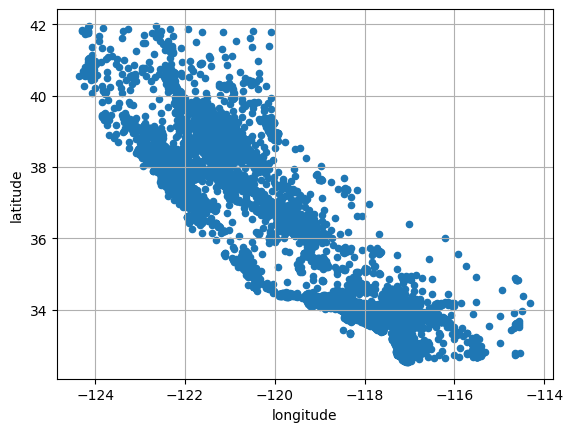

In [ ]:
housing.plot(kind='scatter' ,x="longitude",y="latitude",grid=True)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

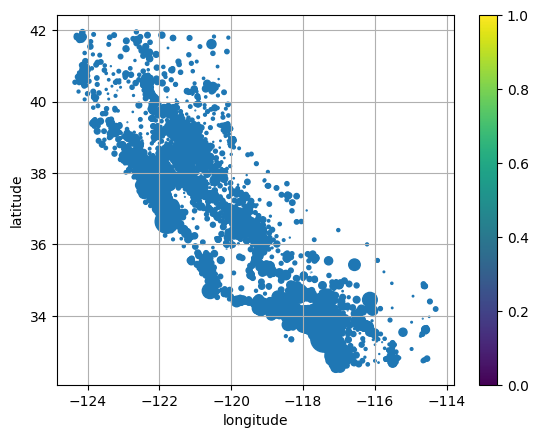

In [ ]:
housing.plot(kind='scatter' ,x="longitude",y="latitude",grid=True, s=housing["population"]/100,cmap="jet",colorbar=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

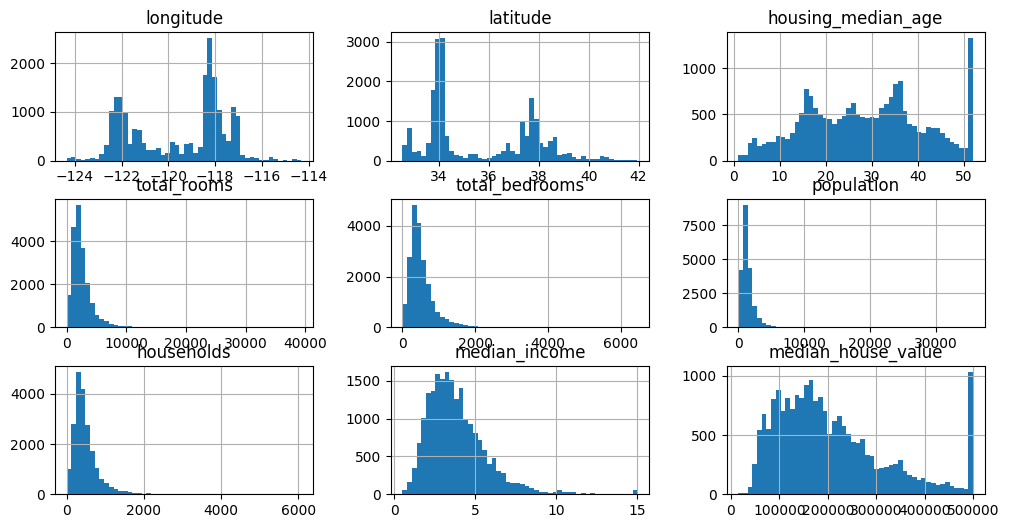

In [ ]:
housing.hist(bins=50, figsize=(12,6))

<Axes: xlabel='longitude', ylabel='latitude'>

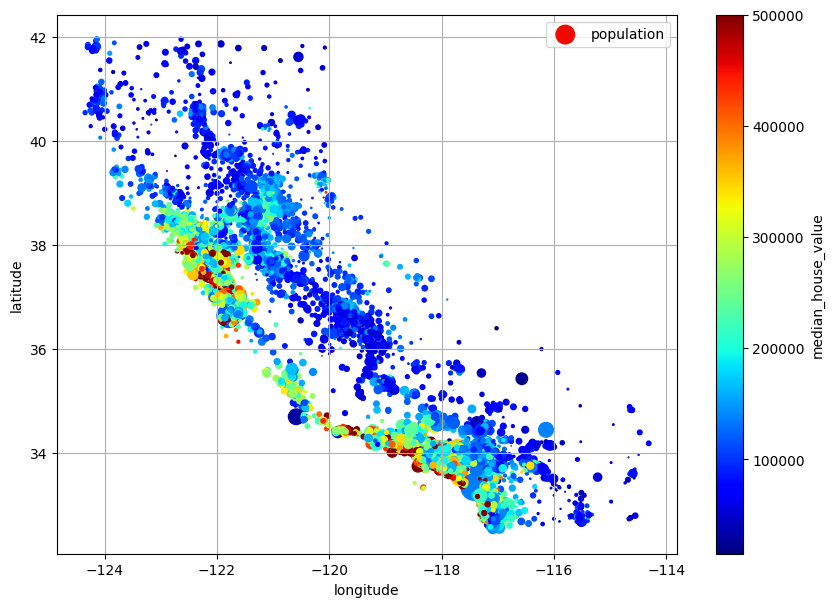

In [ ]:
housing.plot(kind = 'scatter',x='longitude',y='latitude',grid =True,s=housing['population']/100,label='population',c='median_house_value',
             cmap='jet',colorbar=True,legend=True,sharex=False,figsize=(10,7))

In [ ]:
import numpy as np
import pandas as pd

housing['income_cat']= pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=40)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])
strat_train_set,strat_test_set = strat_splits[0]

strat_train_set,strat_test_set = train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=40)

for set_ in (strat_train_set,strat_test_set):
  set_.drop(['income_cat'],axis=1,inplace=True)

housing = strat_train_set.copy()
corr_matrix=housing.corr(numeric_only=True)

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687741
total_rooms,0.156799
housing_median_age,0.092986
households,0.084131
total_bedrooms,0.068181
population,-0.005357
longitude,-0.044765
latitude,-0.143810


In [ ]:
null_rows_idx=housing.isnull().any(axis=1)
housing.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9000,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
4919,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,128100.0,INLAND
12188,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,187500.0,INLAND
12962,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504,151300.0,<1H OCEAN
9733,-118.29,34.05,34.0,1102.0,NaN,1325.0,439.0,1.5972,168800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
9584,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,157800.0,<1H OCEAN
14777,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN
9965,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,500001.0,NEAR OCEAN
15349,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,215100.0,<1H OCEAN


In [ ]:
#deleting a row and entire column
housing_option1=housing.copy()
housing_option1.dropna(subset=['total_bedrooms'],inplace=True)
housing_option1.loc[null_rows_idx].head()
housing_option2=housing.copy()
housing_option2.drop("total_bedrooms",axis=1, inplace=True)
housing_option2.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
9000,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
4919,-121.13,38.87,48.0,1127.0,530.0,186.0,3.0917,128100.0,INLAND
12188,-121.02,37.48,26.0,467.0,244.0,83.0,4.1346,187500.0,INLAND
12962,-118.36,33.96,26.0,3543.0,2742.0,951.0,2.5504,151300.0,<1H OCEAN
9733,-118.29,34.05,34.0,1102.0,1325.0,439.0,1.5972,168800.0,<1H OCEAN


In [ ]:
#replacing missing values with median
housing_option3=housing.copy()
median=housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median,inplace=True)
housing_option3.loc[null_rows_idx].head()

<ipython-input-22-8b99c95556a3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median,inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9000,-119.18,34.19,19.0,2393.0,438.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
4919,-121.13,38.87,48.0,1127.0,438.0,530.0,186.0,3.0917,128100.0,INLAND
12188,-121.02,37.48,26.0,467.0,438.0,244.0,83.0,4.1346,187500.0,INLAND
12962,-118.36,33.96,26.0,3543.0,438.0,2742.0,951.0,2.5504,151300.0,<1H OCEAN
9733,-118.29,34.05,34.0,1102.0,438.0,1325.0,439.0,1.5972,168800.0,<1H OCEAN


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.select_dtypes(include=[np.number])#find out the datatypes that has numbers
imputer.fit(housing_num)
imputer.statistics_


array([-1.1854e+02,  3.4260e+01,  2.9000e+01,  2.1300e+03,  4.3800e+02,
        1.1820e+03,  4.1200e+02,  3.5446e+00,  1.8070e+05])

In [ ]:
housing_num.median().values

array([-1.1854e+02,  3.4260e+01,  2.9000e+01,  2.1300e+03,  4.3800e+02,
        1.1820e+03,  4.1200e+02,  3.5446e+00,  1.8070e+05])

In [ ]:
x=imputer.transform(housing_num)
imputer.feature_names_in_
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9000,-119.18,34.19,19.0,2393.0,438.0,1938.0,762.0,1.6953,167400.0
4919,-121.13,38.87,48.0,1127.0,438.0,530.0,186.0,3.0917,128100.0
12188,-121.02,37.48,26.0,467.0,438.0,244.0,83.0,4.1346,187500.0
12962,-118.36,33.96,26.0,3543.0,438.0,2742.0,951.0,2.5504,151300.0
9733,-118.29,34.05,34.0,1102.0,438.0,1325.0,439.0,1.5972,168800.0


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

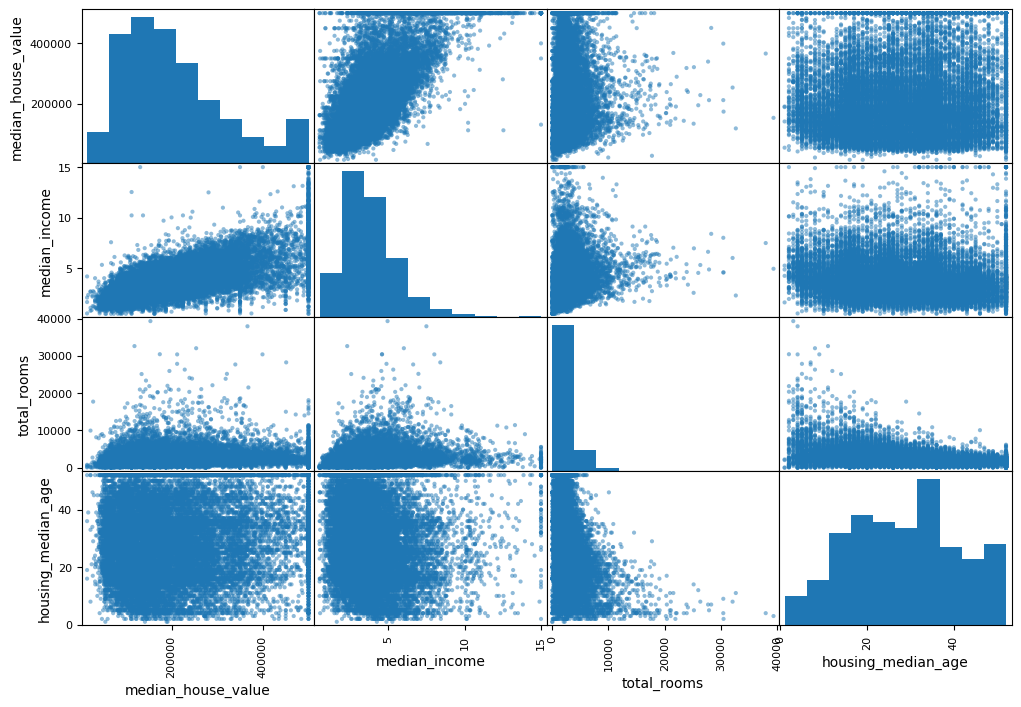

In [ ]:
from pandas.plotting import scatter_matrix

attries = ['median_house_value',"median_income","total_rooms",'housing_median_age']
scatter_matrix(housing[attries],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

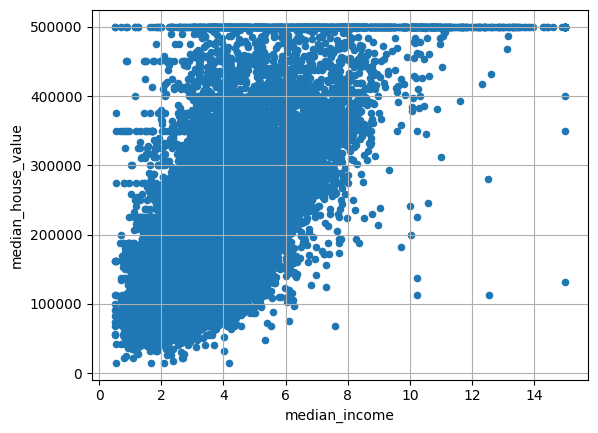

In [ ]:
housing.plot(kind="scatter", x="median_income",y="median_house_value", grid=True)